# Exploring the Impact of filters in a convolutional network

### Filters With Scipy

This section loads an image using PIL, converts it to a NumPy array, and displays the first channel (grayscale) using Matplotlib. This prepares the image for further processing with convolution filters.

2.0.2
(196, 257)


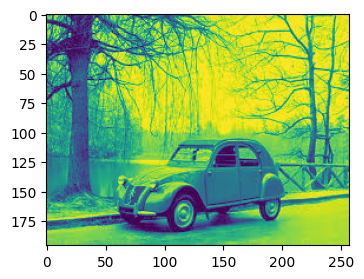

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image
from scipy.signal import convolve2d
import warnings 
warnings.filterwarnings('ignore')

print(np.__version__)


image = Image.open('car.jpg')
image_array = np.array(image)
image_array = image_array[:, :, 0]

print(image_array.shape)

plt.figure(figsize = (5, 3))
plt.imshow(image_array)
plt.show()

Here, we define several common convolution filters (emboss, edge detection, and sharpening) as NumPy arrays. We then apply each filter to the image using `scipy.signal.convolve2d` and display the results to visualize their effects.

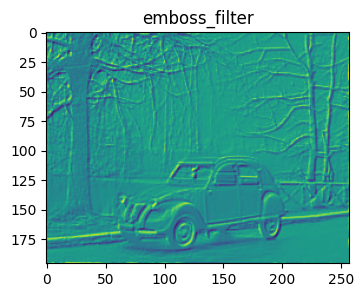

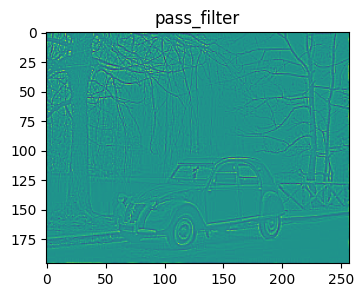

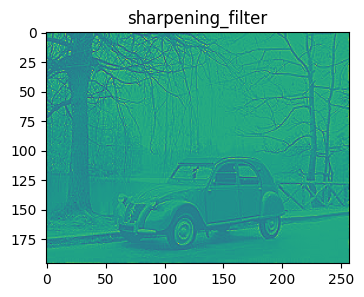

In [9]:
# Relief
emboss_filter = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])   

# Rejaillir les caracteristique les plus intenses
pass_filter = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]) 

# Améliorer la netteté
sharpening_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 

lst_filter = ['emboss_filter', 'pass_filter', 'sharpening_filter']
for filter in lst_filter:
    result = convolve2d(image_array, eval(filter), mode = 'same', boundary = 'wrap')
    plt.figure(figsize = (5, 3))
    plt.title(filter)
    plt.imshow(result)
    plt.show()


# Filters with PyTorch

In this section, we switch to PyTorch to demonstrate how to load and display a grayscale image as a NumPy array. This prepares the image for convolution operations using PyTorch's neural network modules.

(183, 276)


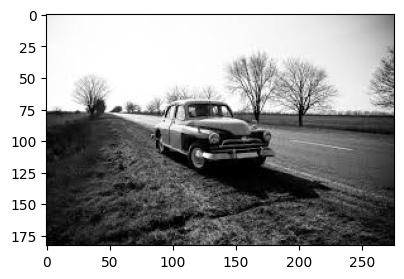

In [10]:
from PIL import Image
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt


img = Image.open('car2.jpg').convert('L')
img_arr = np.array(img)

print(img_arr.shape)
plt.figure(figsize=(5, 3))
plt.imshow(img_arr, cmap='gray')
plt.show()

This function applies a 2D convolution filter multiple times to the input image using PyTorch. You can specify whether to use a bias term and whether to apply a ReLU activation after each convolution. The results of each convolution step are displayed to observe the progressive effect.

We apply the convolution filter without any bias or activation function. This shows how repeated linear transformations affect the image, gradually smoothing or enhancing certain features.

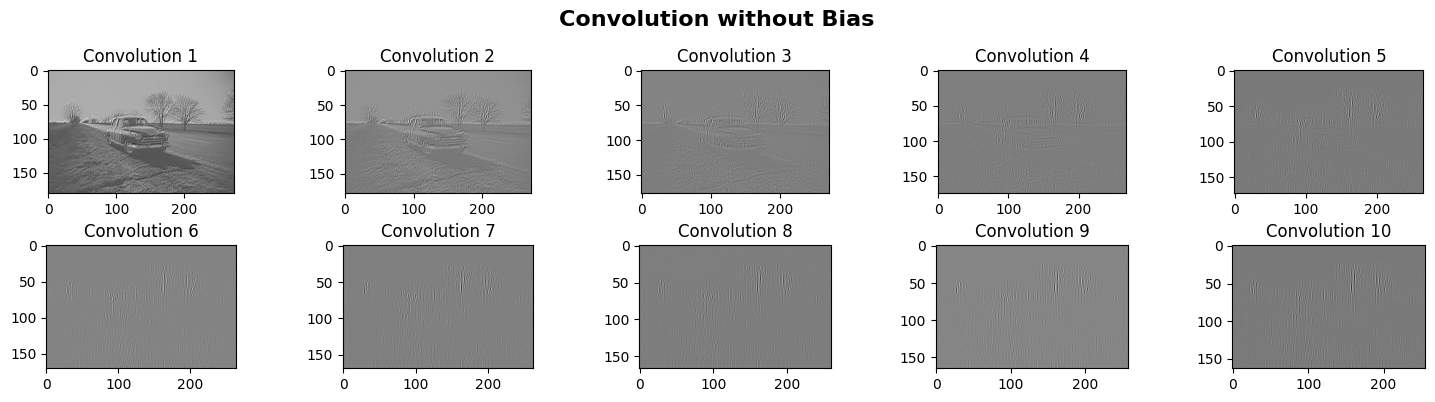

In [11]:
def conv(is_bias:bool = False, bias:float = 0, title:str = '', relu = False):
    conv_filter = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = (3, 3), bias = is_bias)
    # conv_filter.weight.data = torch.tensor([[[-1, 0, 1],
    #                                         [-1, 0, 1],
    #                                         [-1, 0, 1]]], dtype=torch.float32).unsqueeze(0) # Shape: (1, 1, 3, 3)
    if bias:
        conv_filter.bias.data = torch.tensor([bias])
        

    img_tensor = torch.tensor(img_arr, dtype = torch.float32)
    img_tensor = img_tensor.unsqueeze(0).unsqueeze(0) # Shape: (1, 1, H, W)
    
    
    plt.figure(figsize = (15, 4))
    
    func = torch.nn.ReLU()
    output = img_tensor
    
    for i in range(10):
        
        output = conv_filter(output)
        
        if relu:
            output = func(conv_filter(output))

        output_img = output.squeeze().detach().numpy()
        
        plt.suptitle(f'{title}', fontsize = 16, fontweight = 'bold')
        plt.subplot(2, 5, i+1)
        plt.imshow(output_img, cmap = 'gray')
        plt.title(f'Convolution {i+1}')

    plt.tight_layout()
    plt.show()


conv(is_bias = False, bias = None, title = 'Convolution without Bias', relu = False)

Now, we add a negative bias to the convolution. This shifts all output values downward after each convolution, creating a cumulative effect that can highlight certain image features or push pixel values toward extremes.

Nous pouvons voir que sans biais la convolution applique uniquement la transformation linéaire avec les poids du filtre.
L'image conserve une apparence plus naturelle car les valeurs restent centrées autour de zéro.
Les détails sont progressivement atténués mais l'image reste reconnaissable.

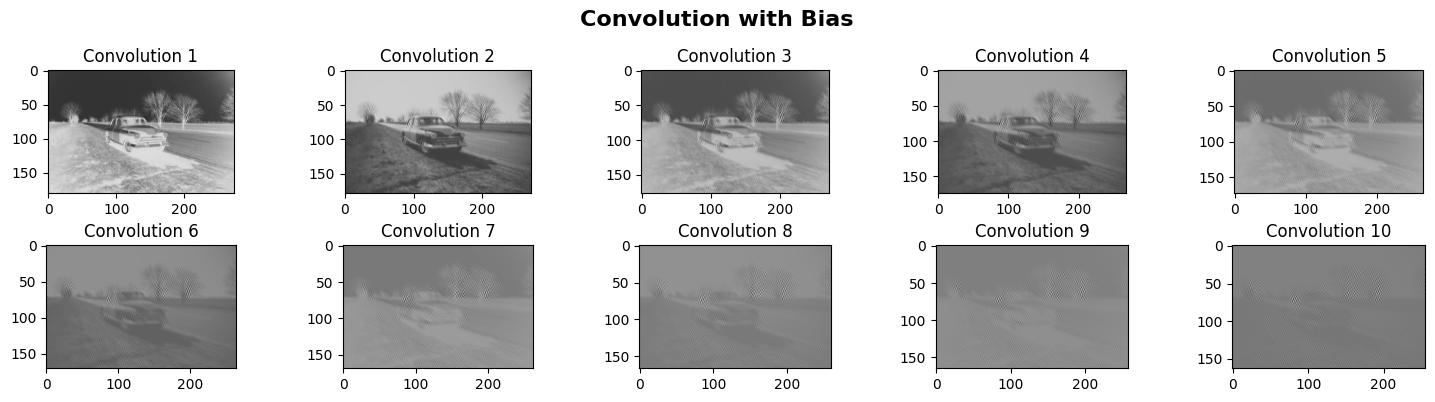

In [12]:
conv(is_bias = True, bias = -0.5, title = 'Convolution with Bias')

Pour cette exemple avec Biais, a chaque convolution, on soustrait 0.5 à toutes les valeurs de sortie
Ce décalage constant vers le bas accumule un effet "relief" ou "embossé"
Les valeurs sont poussées vers les extrêmes, créant un effet de seuil.
Après plusieurs convolutions, l'image devient presque binaire (relief blanc sur fond gris). L'effet est particulièrement visible car le biais négatif (-0.7) est relativement important et l'effet est cumulatif (chaque convolution ajoute ce biais). 

In this example, we apply both a bias and a ReLU activation after each convolution. The ReLU function sets all negative values to zero, which, combined with the bias, can quickly drive the image toward a high-contrast, thresholded appearance.

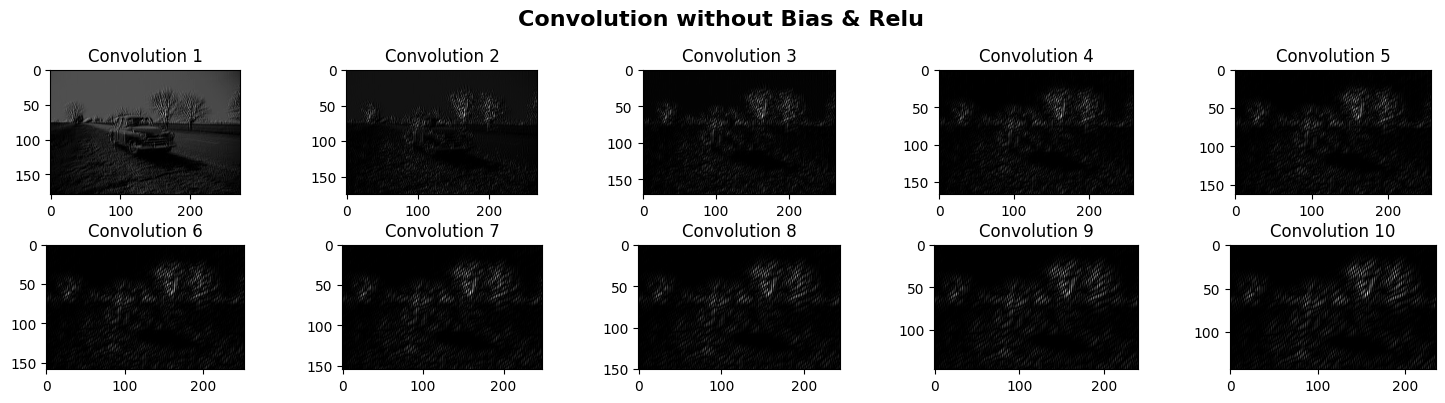

In [13]:
conv(is_bias = True, bias =  -0.1, title = 'Convolution without Bias & Relu', relu = True)

Finally, we use a zero bias with the ReLU activation. This demonstrates the effect of repeated convolutions with non-linearity, showing how the image evolves when only the filter weights and activation function are applied.

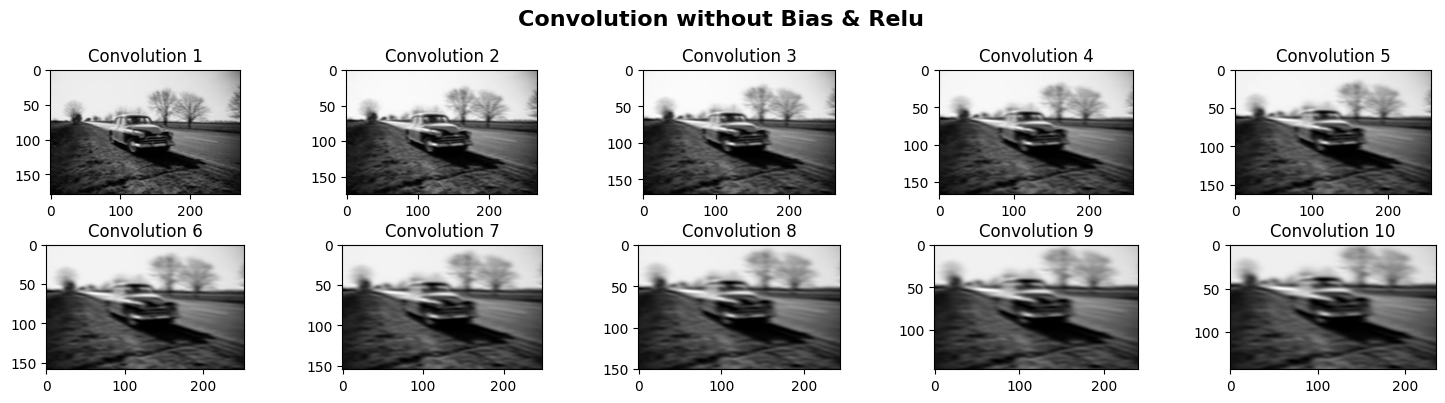

In [14]:
conv(is_bias = True, bias = -0.0, title = 'Convolution without Bias & Relu', relu = True)